In [1]:
from bs4 import BeautifulSoup
import requests
import json

url = 'https://www.fotmob.com/en-GB/matches/real-madrid-vs-barcelona/2grk20#4205445'

response = requests.get(url)


if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    data_element = soup.find('script', {'type': 'application/json'})

    if data_element:
        data_json = json.loads(data_element.text)
        with open('barca-rm.json', 'w') as file:
            json.dump(data_json, file, indent=4)

In [128]:
import json
with open('barca-rm.json', 'r') as file:
    data = json.load(file)

data = data
main_content = data['props']['pageProps']['content']
home_team = data['props']['pageProps']['general']['homeTeam']['name']
away_team = data['props']['pageProps']['general']['awayTeam']['name']

Real Madrid


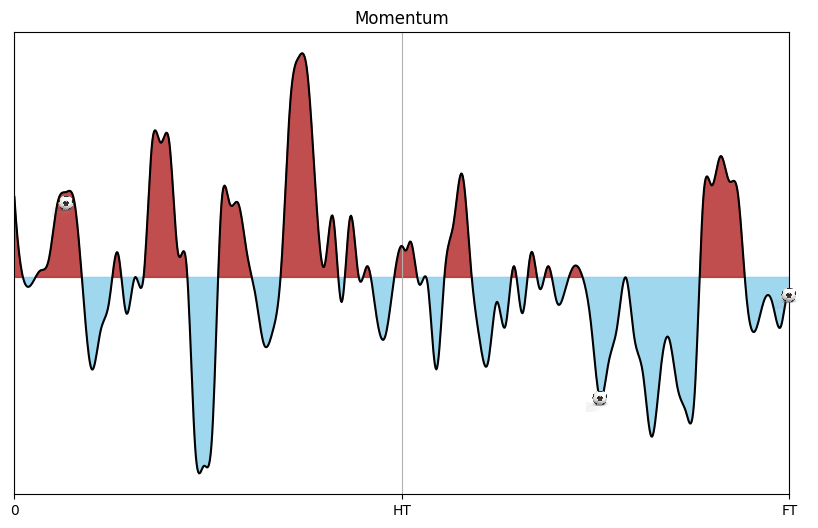

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import interp1d
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


momentum_data = main_content['matchFacts']['momentum']['main']['data']

path = './ball_.png'
image = plt.imread(path)

home_team_goals_data = data['props']['pageProps']['header']['events']['homeTeamGoals']
away_team_goals_data = data['props']['pageProps']['header']['events']['awayTeamGoals']


goals_minutes = []

for goal in home_team_goals_data.values():
    for el in goal:
        goals_minutes.append(el['time'])

for goal in away_team_goals_data.values():
    for el in goal:
        goals_minutes.append(el['time'])


def print_momentum_data(data: dict):

    minutes = np.array([entry['minute'] for entry in data])
    values = np.array([entry['value'] for entry in data])

    unique_minutes, unique_indices = np.unique(minutes, return_index=True)
    unique_values = values[unique_indices]

    interpolation_model = interp1d(
        unique_minutes, unique_values, kind="cubic", fill_value="extrapolate")

    X_ = np.linspace(0, 90, 1000)

    Y_ = interpolation_model(X_)

    plt.figure(figsize=(10, 6))

    plt.fill_between(X_, Y_, where=(Y_ < 0),
                     interpolate=True, color='skyblue', alpha=0.8)

    plt.fill_between(X_, Y_, where=(Y_ >= 0),
                     interpolate=True, color='firebrick', alpha=0.8)

    plt.plot(X_, Y_, color='black')
    plt.xlim(0, 90)
    plt.xticks(np.arange(0, 91, step=45), labels=['0', "HT", "FT"])
    plt.yticks([])
    plt.grid(True, axis='x')
    for minute in goals_minutes:
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.01), (minute, values[minute]), frameon=False)
        plt.gca().add_artist(ab)

    plt.title('Momentum')

    plt.show()


print_momentum_data(momentum_data)

In [51]:
import re


def show_stats_data(data: dict):
    labels = list(data.keys())
    values = list(data.values())

    def extract_numeric(value):
        if isinstance(value, str):
            # Extract numeric part using regular expression
            numeric_part = re.search(r'\d+(\.\d+)?', value)
            if numeric_part:
                return float(numeric_part.group())
        return float(value)

    float_values = [[extract_numeric(value)
                    for value in sublist] for sublist in values]

    first_team = [el[0] for el in float_values]
    second_team = [el[1] for el in float_values]

    sum_team = [first_team[i] + second_team[i]
                for i in range(min(len(first_team), len(second_team)))]

    first_team_normalized = [first_team[i] * 100 / sum_team[i]
                             for i in range(min(len(first_team), len(sum_team)))]
    second_team_normalized = [second_team[i] * 100 / sum_team[i]
                              for i in range(min(len(second_team), len(sum_team)))]

    fig, ax = plt.subplots(figsize=(10, 6))

    p1 = ax.barh(labels, first_team_normalized,
                 color='firebrick', label='Barcelona')
    p2 = ax.barh(labels, [-val for val in second_team_normalized],
                 color='skyblue', label='Real Madrid')

    for rect in p1:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2,
                f'{first_team[p1.index(rect)]}', ha='left', va='center')

    for rect in p2:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2,
                f'{second_team[p2.index(rect)]}', ha='right', va='center')

    ax.legend()
    ax.set_xticks([])
    plt.show()

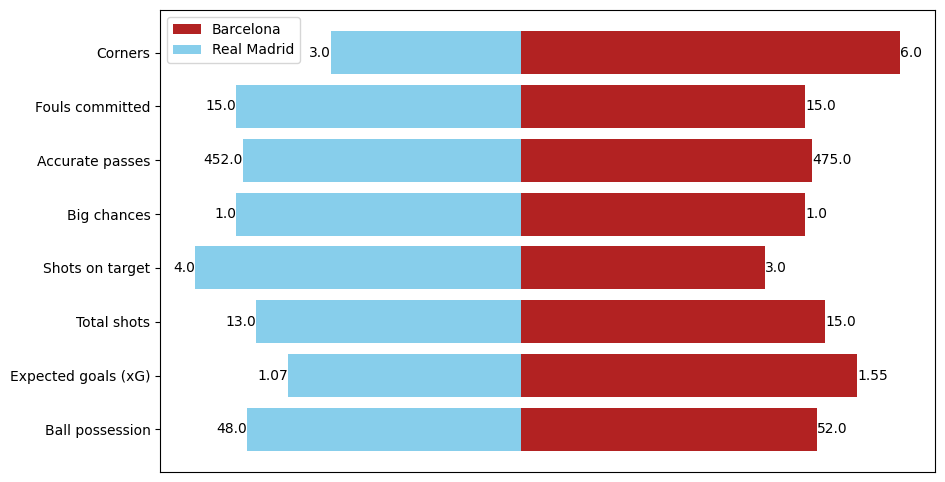

In [55]:
stats_data = main_content['stats']['Periods']['All']['stats'][0]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']

show_stats_data(data)

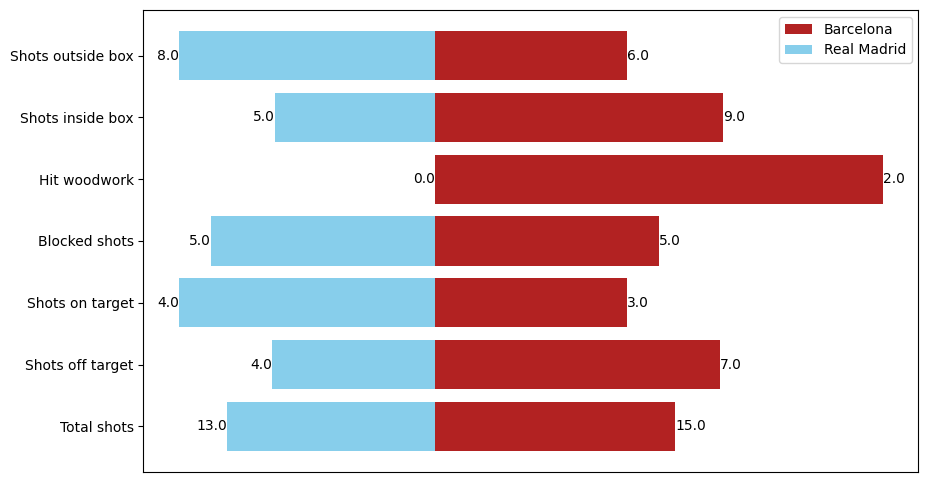

In [41]:
stats_data = main_content['stats']['Periods']['All']['stats'][1]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

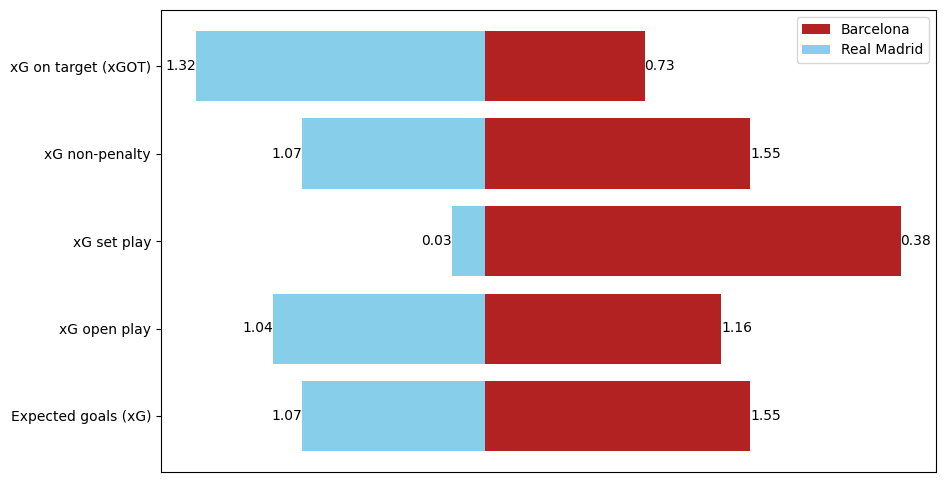

In [42]:
stats_data = main_content['stats']['Periods']['All']['stats'][2]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

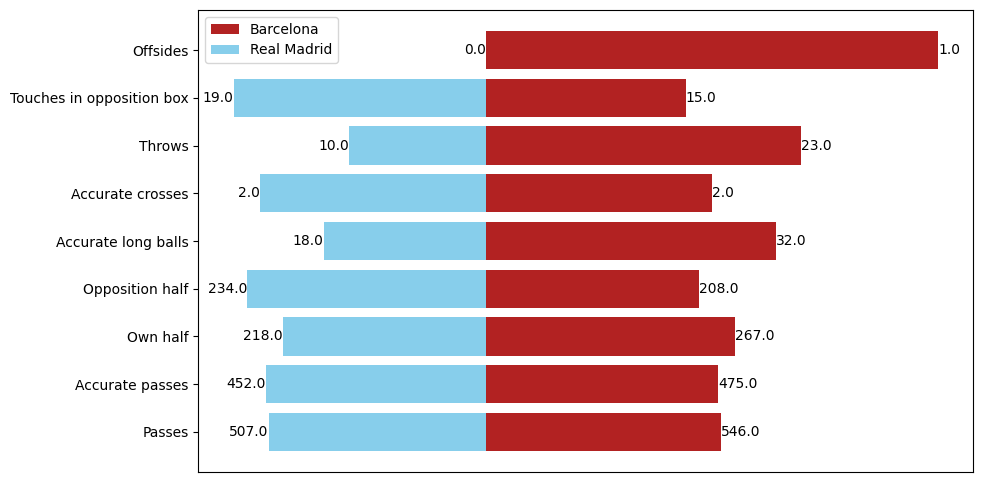

In [43]:
stats_data = main_content['stats']['Periods']['All']['stats'][3]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

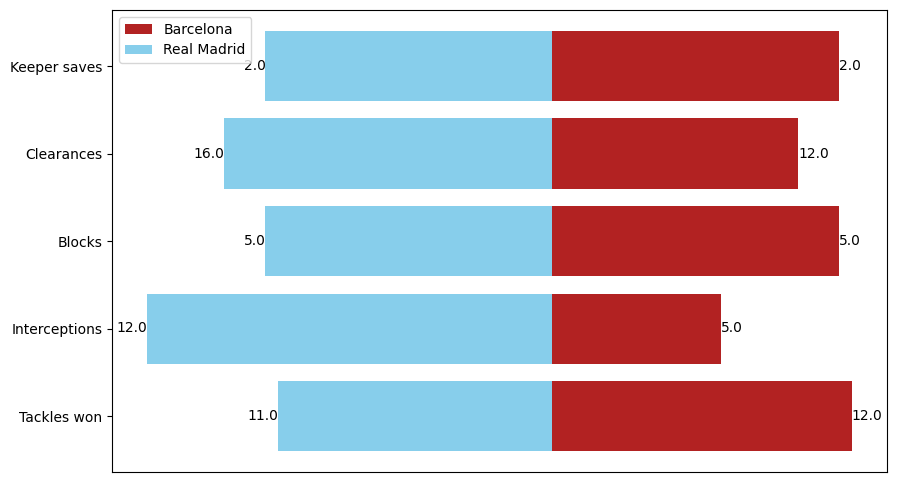

In [44]:
stats_data = main_content['stats']['Periods']['All']['stats'][4]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

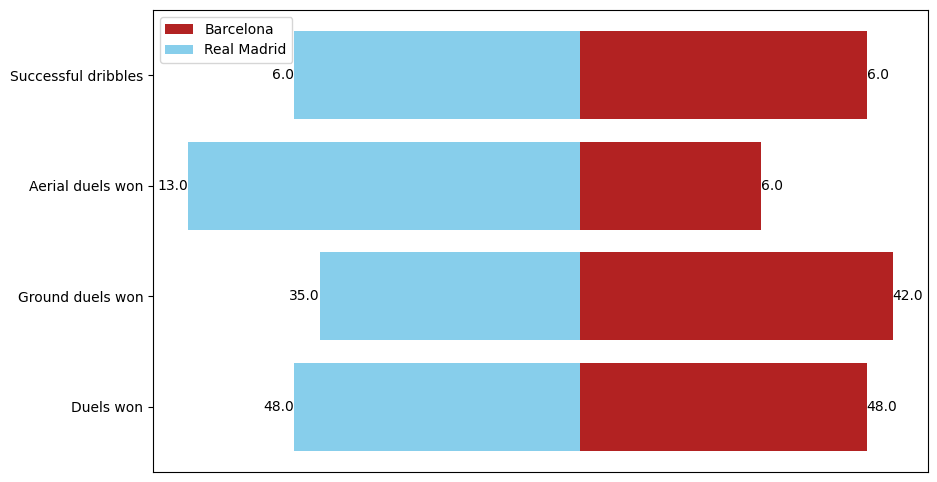

In [45]:
stats_data = main_content['stats']['Periods']['All']['stats'][5]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

Text(0.5, 1.0, 'Barcelona Shot Map')

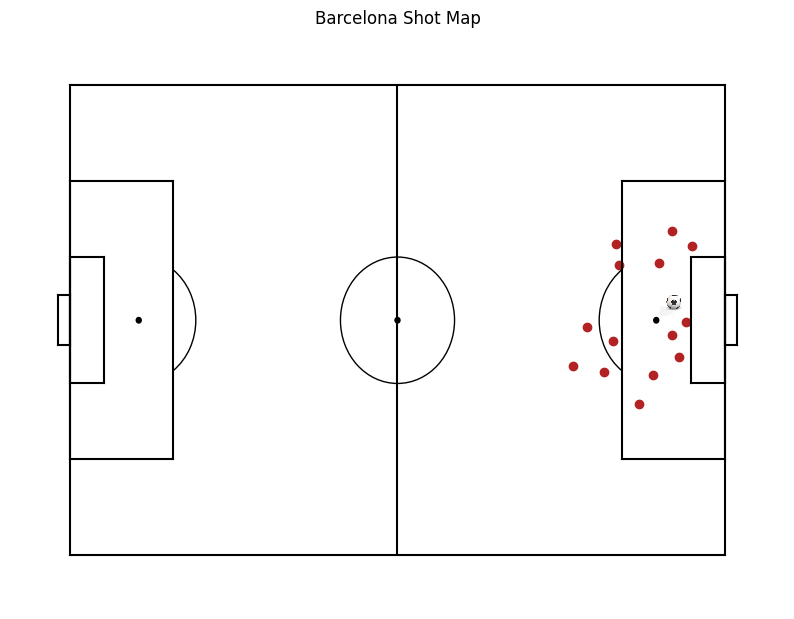

In [356]:
# Shot Maps
import matplotsoccer
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

shots_data = main_content['shotmap']['shots']

first_team_shots = []
second_team_shots = []
path = './ball_.png'
image = plt.imread(path)

for el in shots_data:
    if el['teamId'] != 8633:
        first_team_shots.append(
            {'x': el['x'], 'y': el['y'], 'eventType': el['eventType'], 'color': 'green' if el['eventType'] == 'Goal' else 'firebrick'})
    else:
        second_team_shots.append(
            {'x': el['x'], 'y': el['y'], 'eventType': el['eventType'], 'color': 'green' if el['eventType'] == 'Goal' else 'skyblue'})

matplotsoccer.field("white", figsize=10, show=False)

for el in first_team_shots:
    if el['eventType'] == 'Goal':
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.01), (el['x'], el['y']), frameon=False)
        plt.gca().add_artist(ab)
    plt.scatter(el['x'], el['y'], color=el['color'],
                linewidths=1)

plt.title('Barcelona Shot Map')

Text(0.5, 1.0, 'Real Madrid Shot Map')

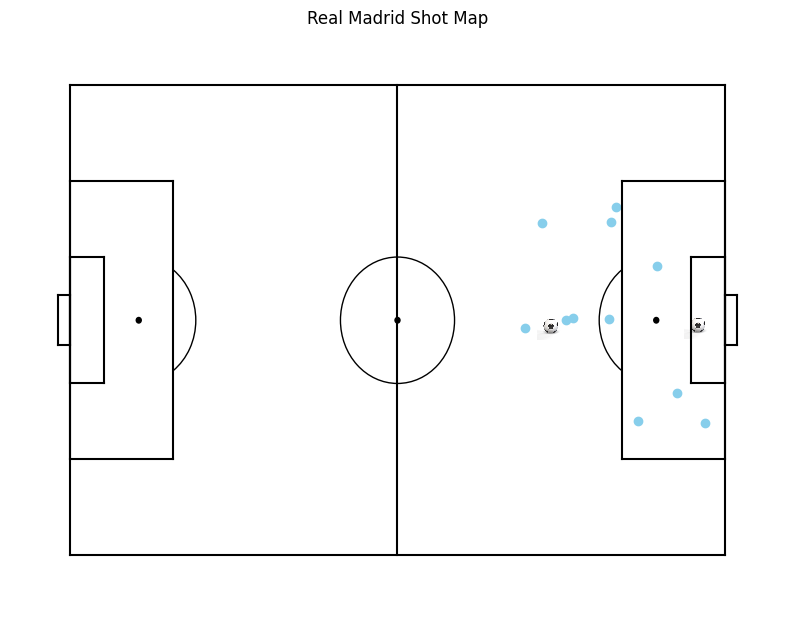

In [357]:
# Shot Maps
matplotsoccer.field("white", figsize=10, show=False)
for el in second_team_shots:
    if el['eventType'] == 'Goal':
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.01), (el['x'], el['y']), frameon=False)
        plt.gca().add_artist(ab)
    plt.scatter(el['x'], el['y'], color=el['color'], linewidths=1)

plt.title('Real Madrid Shot Map')

In [172]:
from matplotlib.font_manager import FontProperties


def show_table_data(columns: list, table_data: dict, scaleX: float, scaleY: float, fig_size: tuple, title: str, pad=int):
    header_colors = ['lightsteelblue'] * len(columns)
    fig, ax = plt.subplots(figsize=(fig_size), dpi=300)

    the_table = plt.table(
        cellText=table_data, colLabels=columns, loc='center', cellLoc='center', colColours=header_colors, colWidths=[0.1 if len(x) < 15 else 0.15 for x in columns])
    the_table.auto_set_column_width([0])
    the_table.auto_set_font_size(False)
    the_table.scale(scaleX, scaleY)

    ax.set_axis_off()
    ax.set_title(f'Barcelona vs Real Madrid - {title}', pad=pad, fontdict={
                 'fontweight': 'bold', 'fontsize': 16})

    for (row, col), cell in the_table.get_celld().items():
        cell.set_text_props(
            fontproperties=FontProperties(family='serif', size=14))
        if (row == 0) or (col == -1):
            cell.set_text_props(
                fontproperties=FontProperties(weight='bold', size=14))

    plt.show()

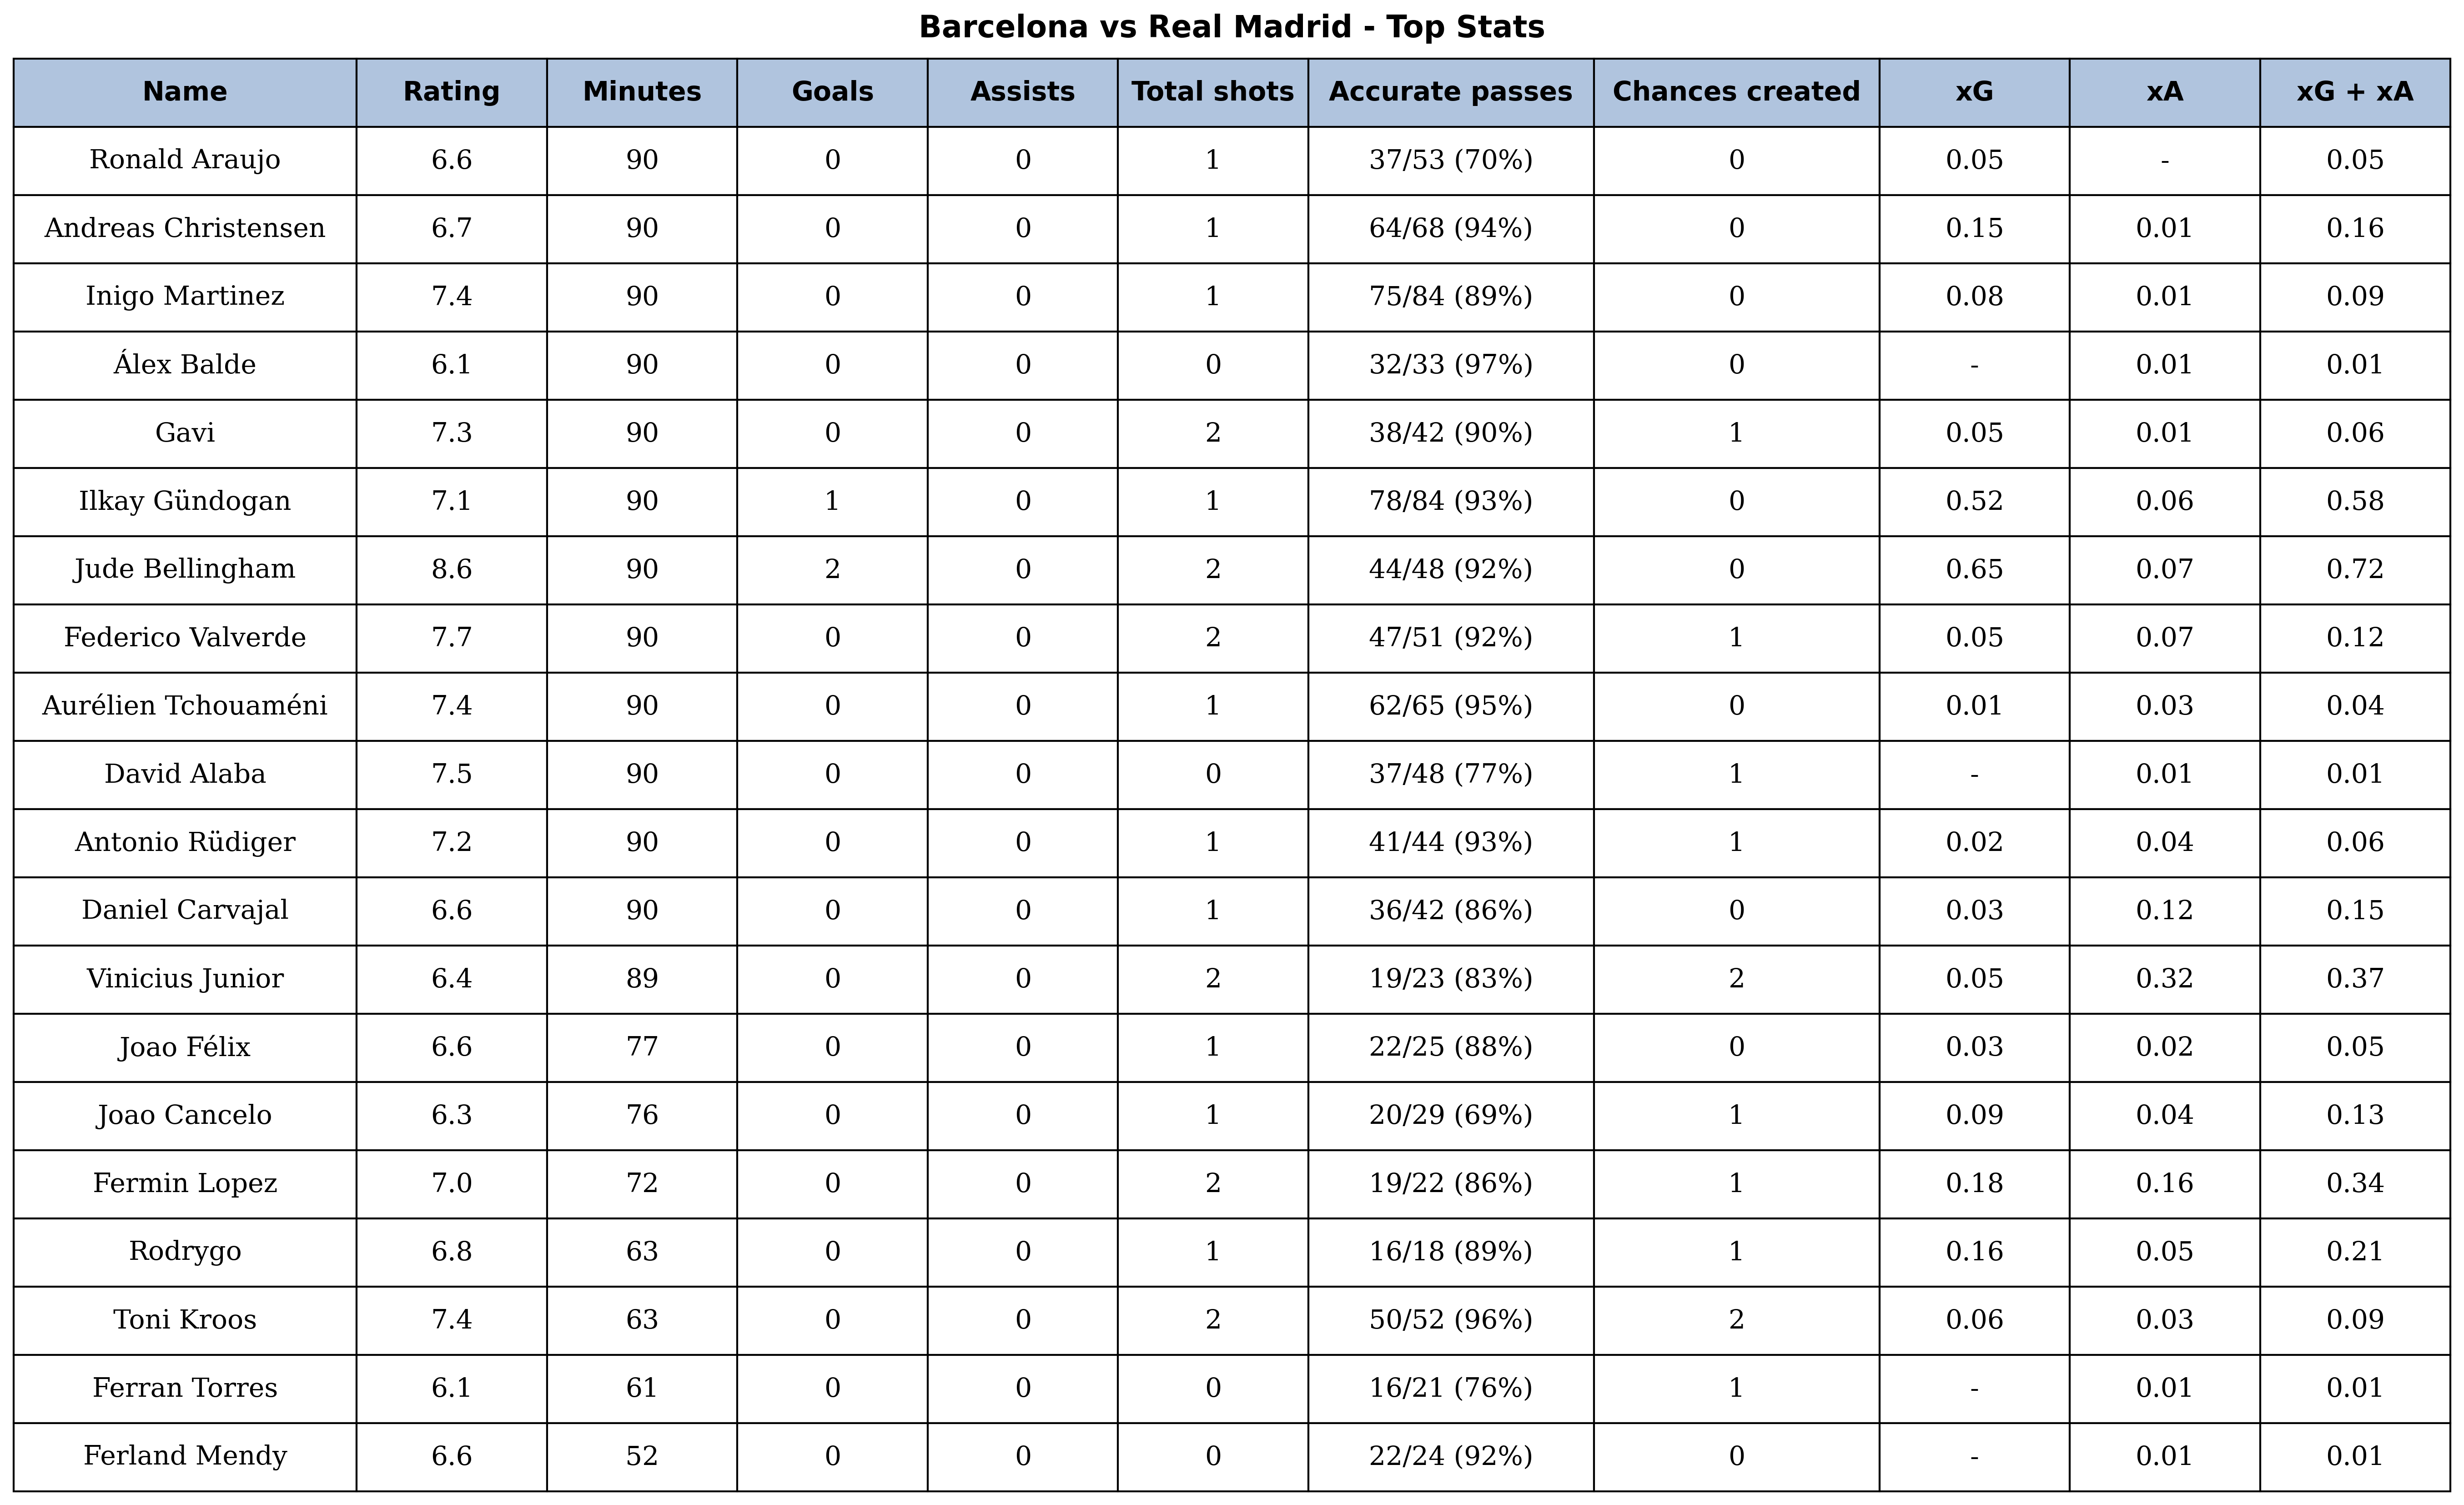

In [195]:
# Main Stat
first_team_players_data = main_content['lineup']['lineup'][0]['players']
second_team_players_data = main_content['lineup']['lineup'][1]['players']

columns = ['Name', "Rating", 'Minutes', 'Goals', 'Assists', 'Total shots', 'Accurate passes',
           'Chances created', 'xG', 'xA', 'xG + xA']

table_data = []


def get_players_top_data(players: dict):
    for data in players:
        for player in data:
            if player["role"] != 'Keeper':
                item = player['stats'][0]['stats']
                table_data.append([player['name']['fullName'],
                                   player['rating']['num'],
                                   player['minutesPlayed'],
                                   item.get('Goals', {}).get(
                                       'value', '-'),
                                   item.get('Assists', {}).get(
                                       'value', '-'),
                                   item.get('Total shots', {}).get(
                                       'value', '-'),
                                   item.get('Accurate passes', {}).get(
                                       'value', '-'),
                                   item.get('Chances created', {}).get(
                                       'value', '-'),
                                   item.get('Expected goals (xG)', {}).get(
                                       'value', '-'),
                                   item.get('Expected assists (xA)', {}).get(
                                       'value', '-'),
                                   item.get('xG + xA', {}).get(
                                       'value', '-'),
                                   ])


get_players_top_data(first_team_players_data)
get_players_top_data(second_team_players_data)

sorted_table_data = sorted(table_data, key=lambda x: x[2], reverse=True)

show_table_data(columns=columns, table_data=sorted_table_data,
                scaleX=3, scaleY=3, fig_size=(6, 9), title='Top Stats', pad=140)

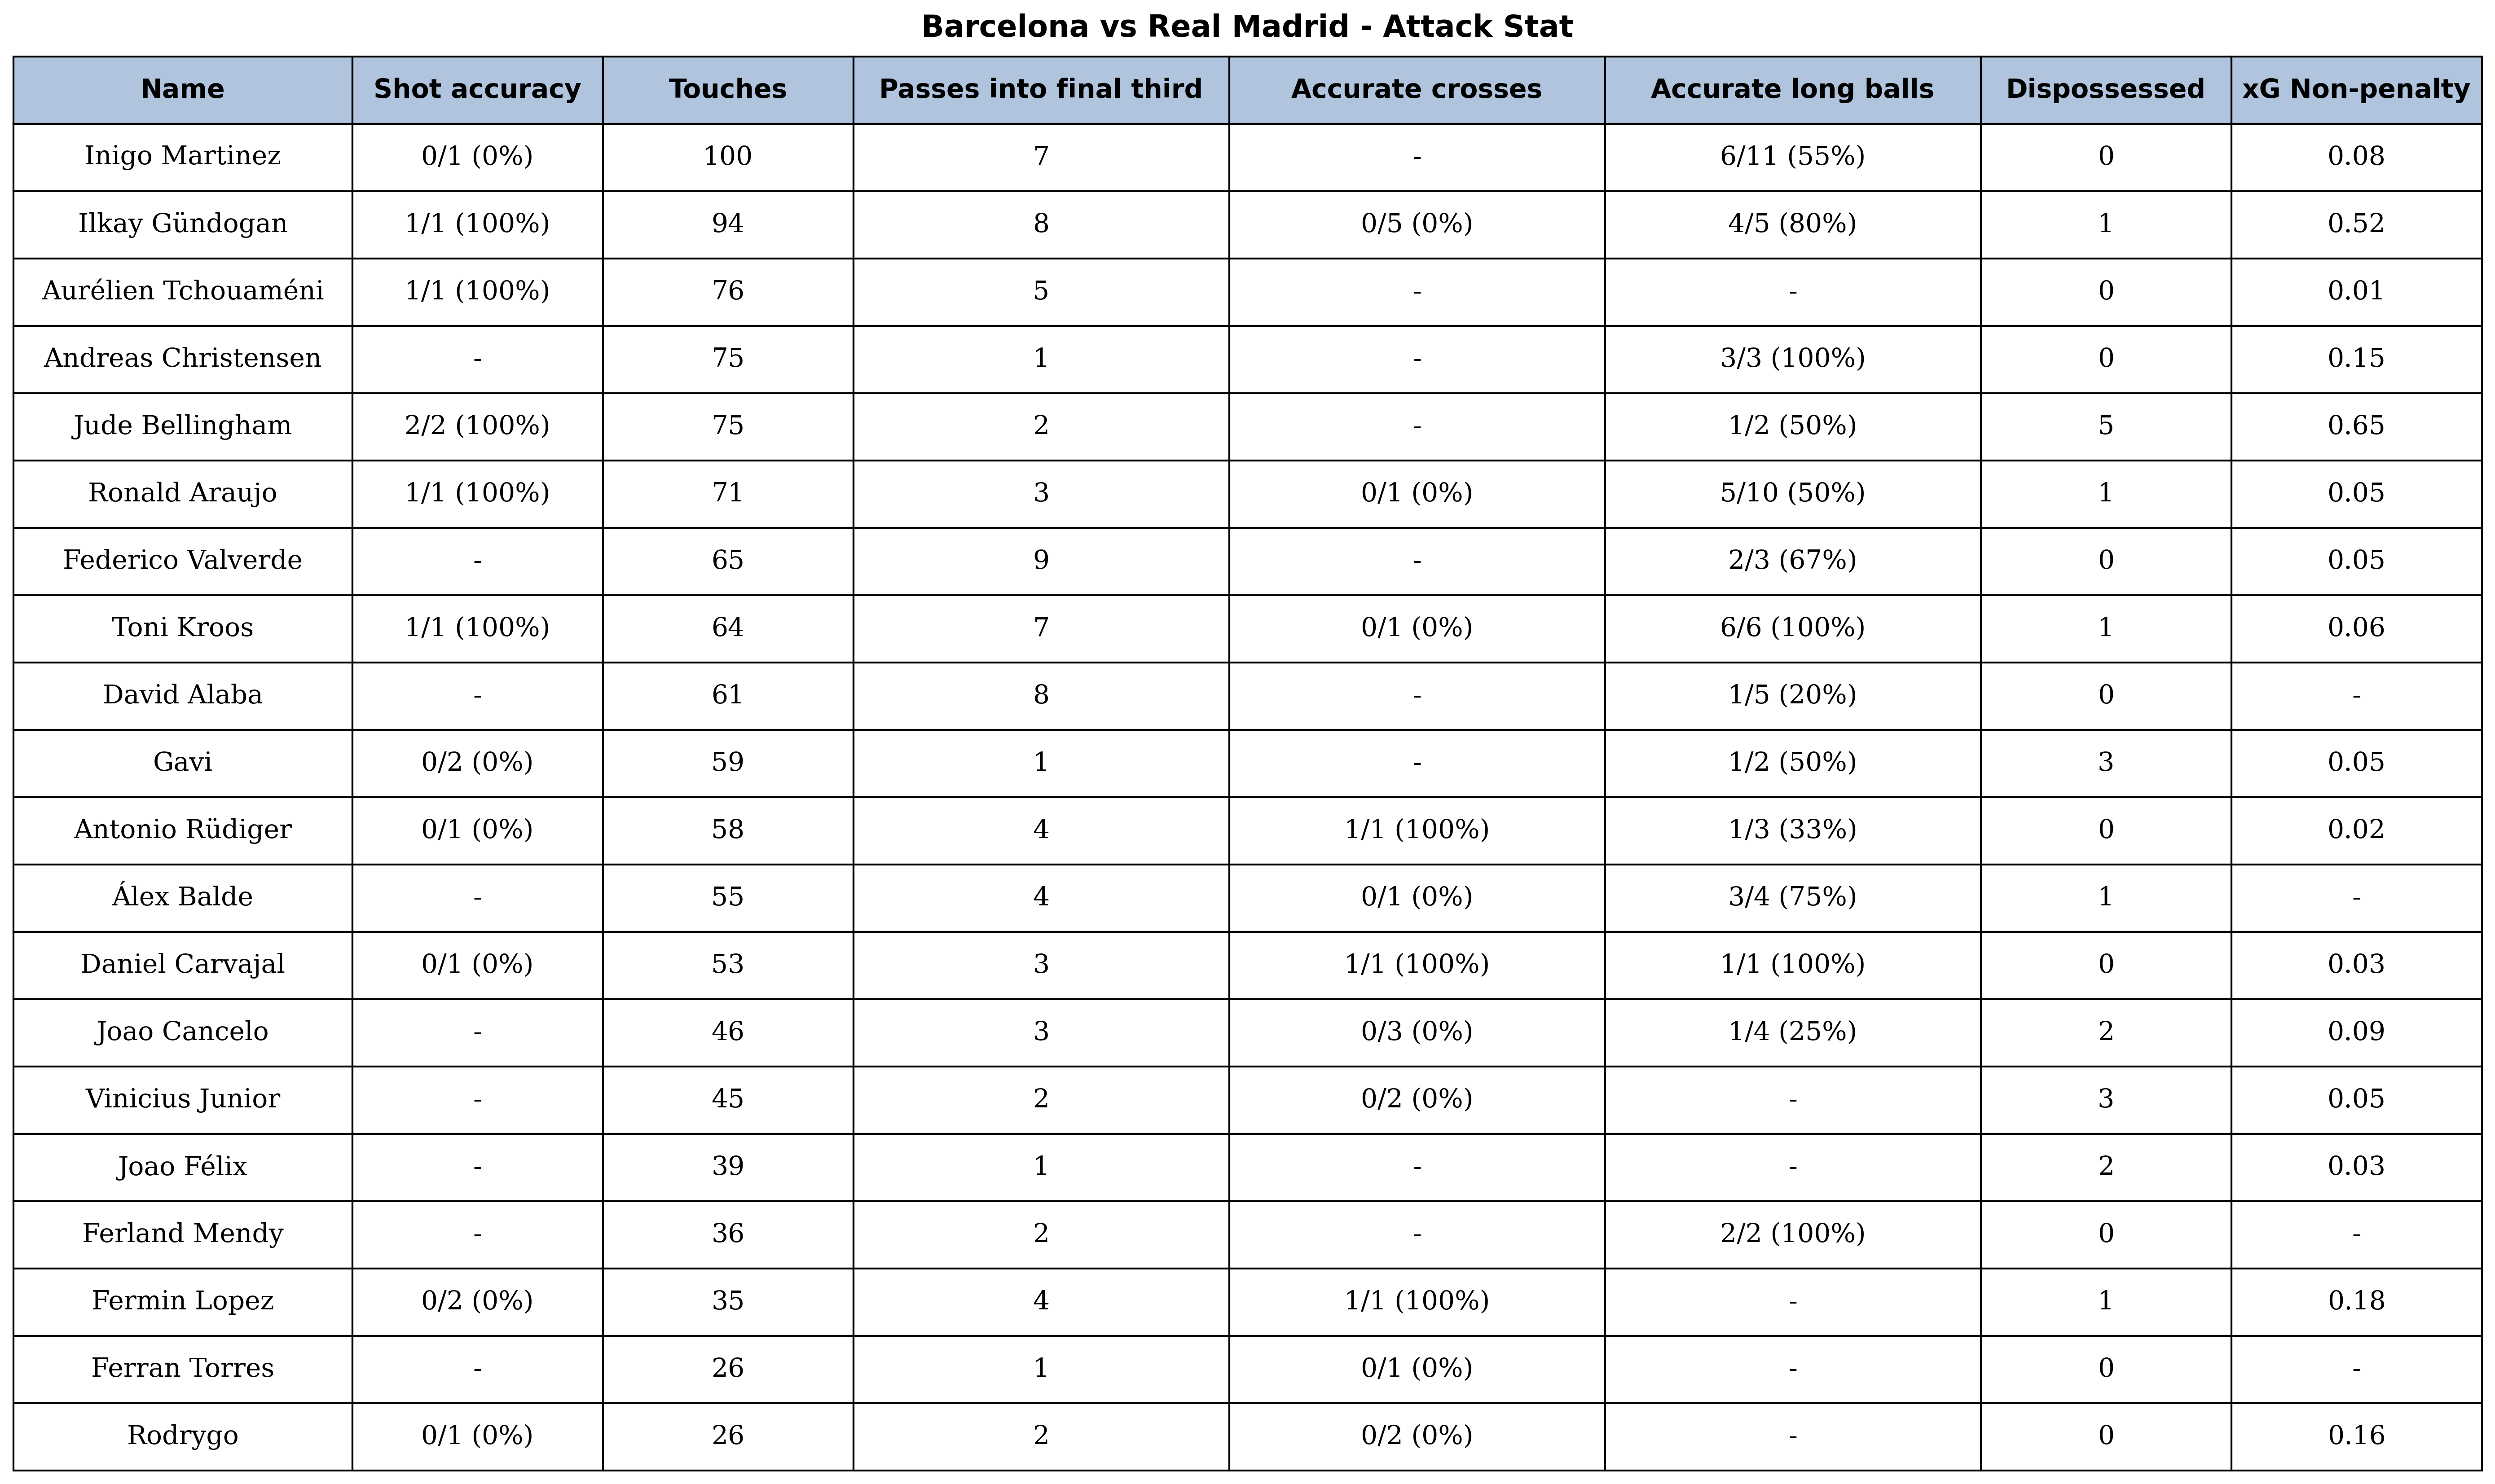

In [191]:
# Attack Stats
first_team_attack_players_data = main_content['lineup']['lineup'][0]['players']
second_team_attack_players_data = main_content['lineup']['lineup'][1]['players']

attack_columns = ['Name', 'Shot accuracy', 'Touches', 'Passes into final third',
                  'Accurate crosses', 'Accurate long balls', 'Dispossessed', 'xG Non-penalty']

attack_table_data = []


def get_players_attack_data(players: dict):
    for data in players:
        for player in data:
            if player["role"] != 'Keeper':
                item = player['stats'][1]['stats']
                player_stat = []
                for el in attack_columns:
                    if el == 'Name':
                        player_stat.append(player['name']['fullName'])
                    else:
                        player_stat.append(item.get(el, {}).get('value', '-'))
                attack_table_data.append(player_stat)


get_players_attack_data(first_team_attack_players_data)
get_players_attack_data(second_team_attack_players_data)


sorted_table_data = sorted(attack_table_data, key=lambda x: x[2], reverse=True)

show_table_data(columns=attack_columns,
                table_data=sorted_table_data, scaleX=3, scaleY=3, fig_size=(8, 5), title="Attack Stat", pad=250)

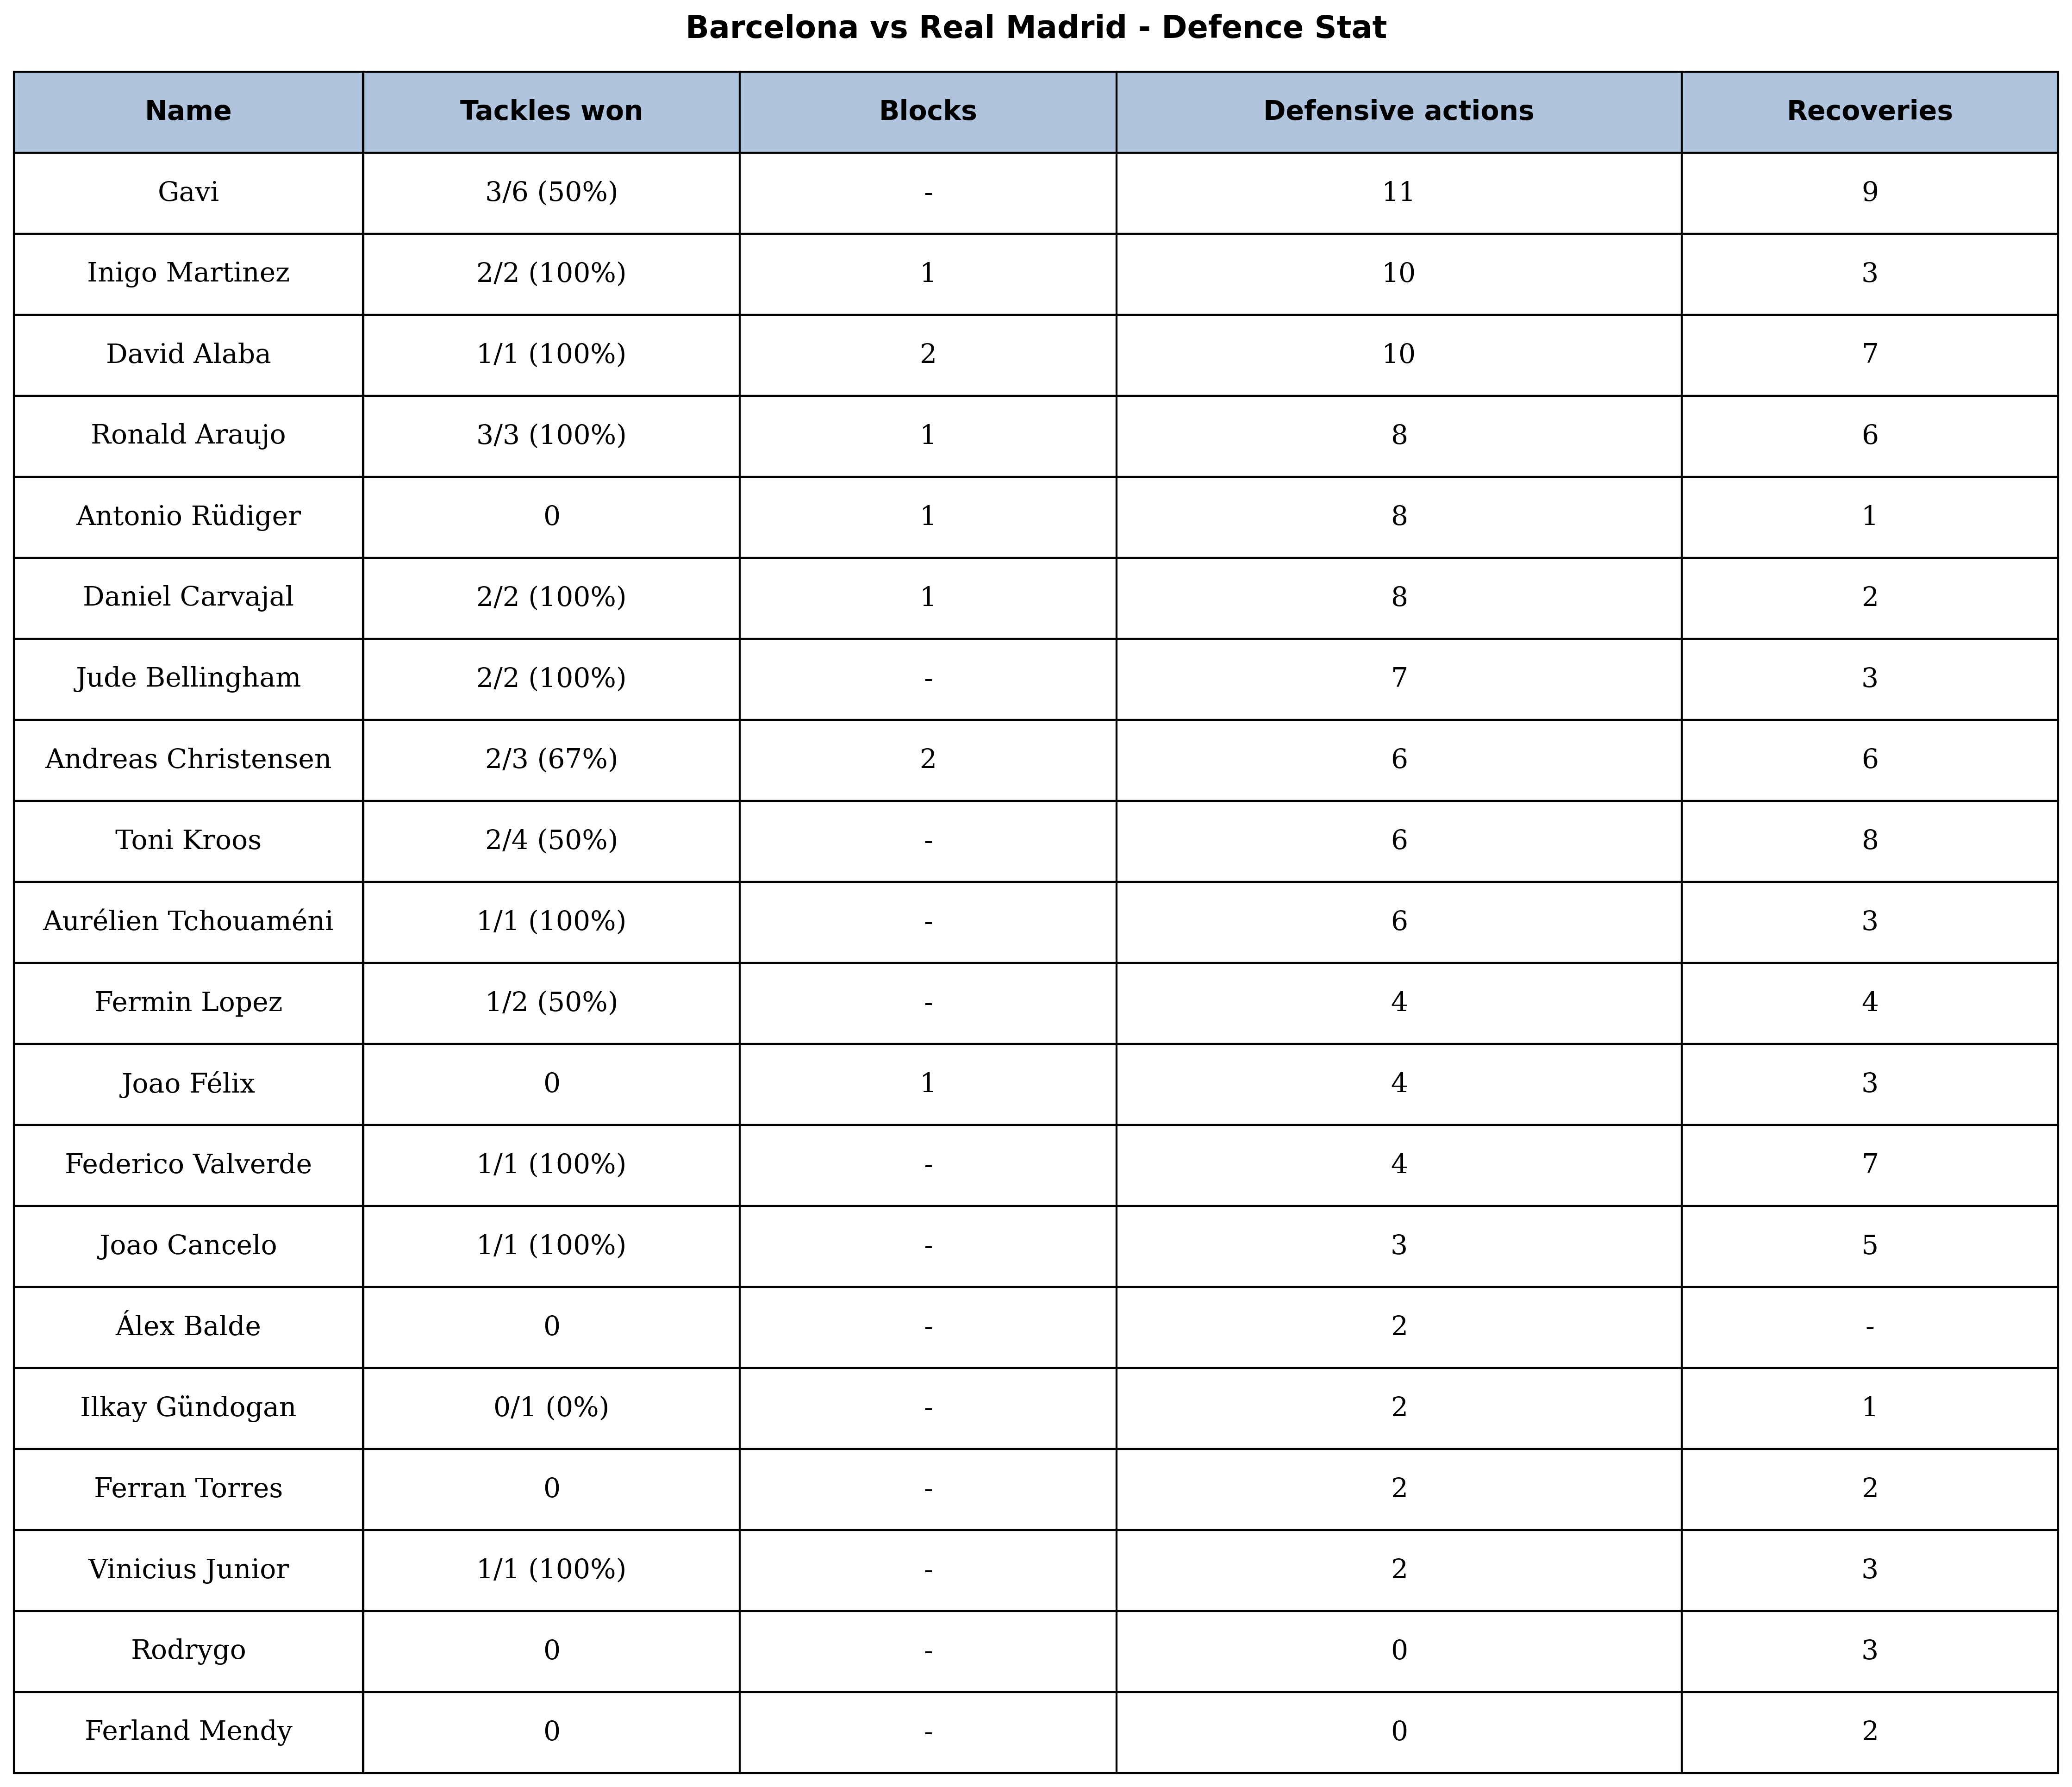

In [234]:
# Defence Stats
first_team_defence_players_data = main_content['lineup']['lineup'][0]['players']
second_team_defence_players_data = main_content['lineup']['lineup'][1]['players']

defence_columns = ['Name', 'Tackles won',
                   'Blocks', "Defensive actions", 'Recoveries']

defence_table_data = []


def get_players_defence_data(players: dict):
    for data in players:
        for player in data:
            if player["role"] != 'Keeper':
                item = player['stats'][2]['stats']
                player_stat = []
                for el in defence_columns:
                    if el == 'Name':
                        player_stat.append(player['name']['fullName'])
                    else:
                        player_stat.append(item.get(el, {}).get('value', '-'),)

                defence_table_data.append(player_stat)


get_players_defence_data(first_team_defence_players_data)
get_players_defence_data(second_team_defence_players_data)


sorted_table_data = sorted(
    defence_table_data, key=lambda x: x[3], reverse=True)

show_table_data(columns=defence_columns,
                table_data=sorted_table_data, scaleX=3.5, scaleY=3.5, fig_size=(10, 5), title='Defence Stat', pad=320)

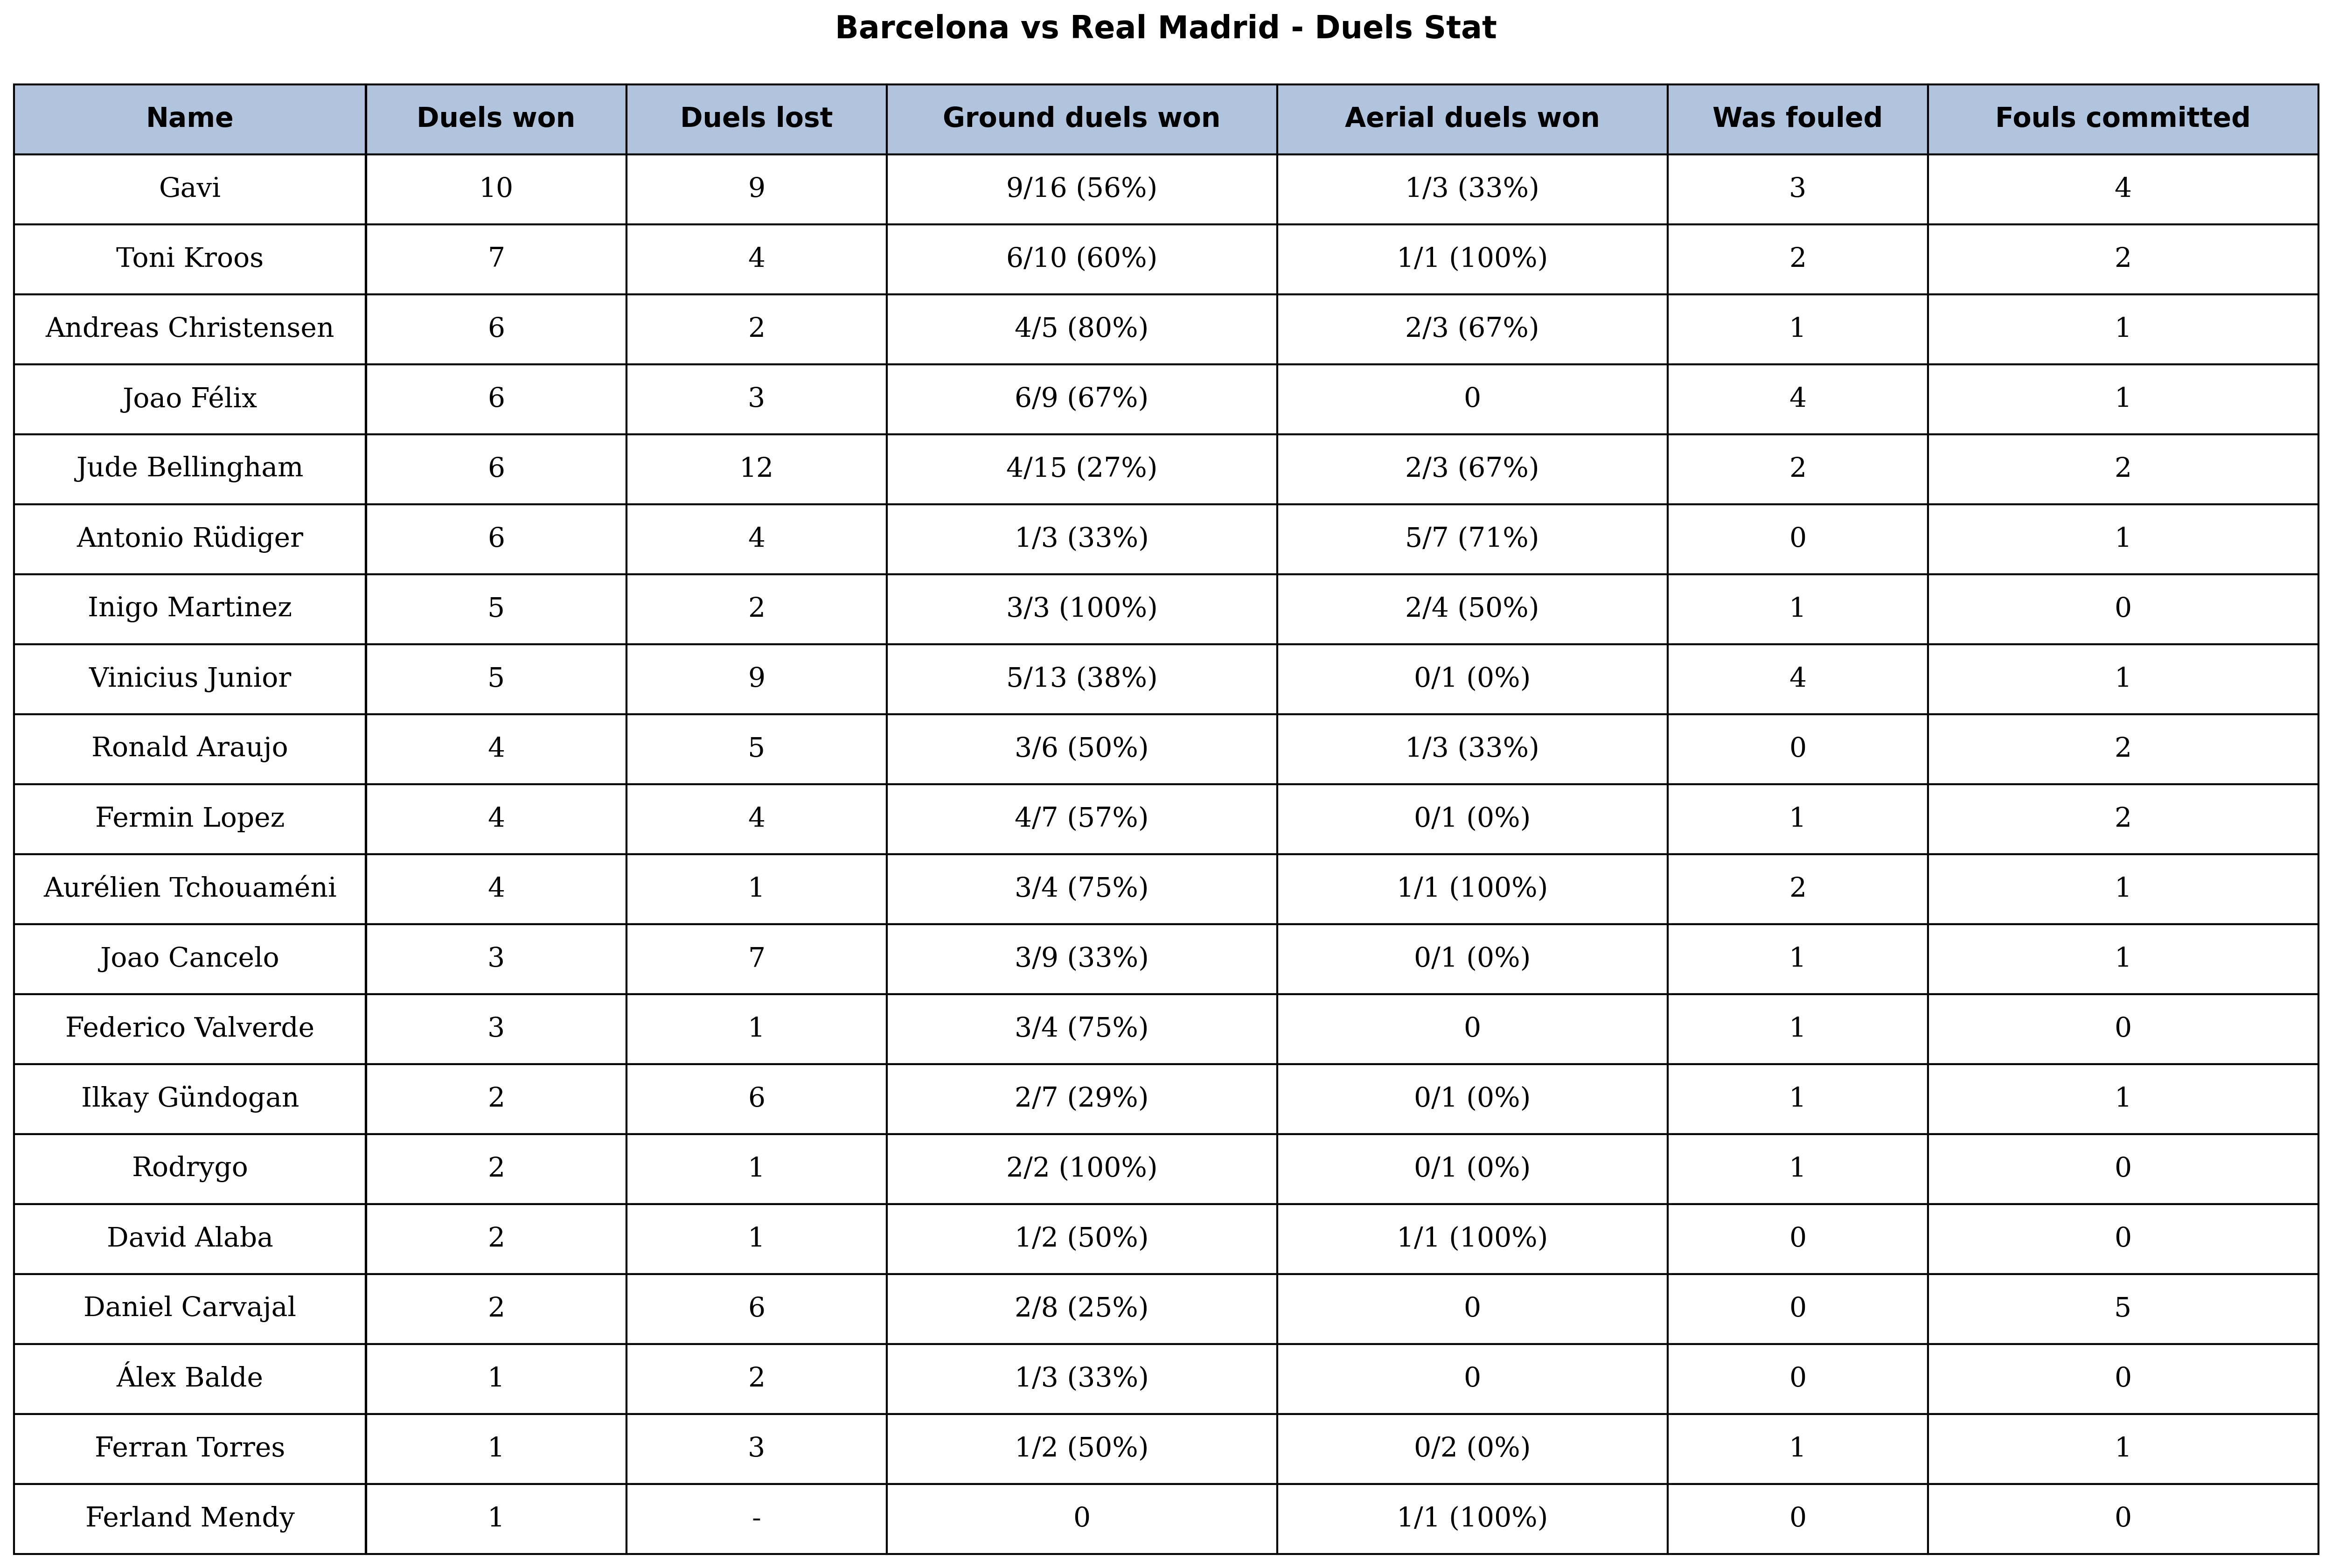

In [213]:
# Duels Stat
first_team_duels_players_data = main_content['lineup']['lineup'][0]['players']
second_team_duels_players_data = main_content['lineup']['lineup'][1]['players']

duels_columns = ['Name', 'Duels won',
                 'Duels lost', "Ground duels won", 'Aerial duels won', 'Was fouled', 'Fouls committed']

duels_table_data = []


def get_players_duels_data(players: dict):
    for data in players:
        for player in data:
            if player["role"] != 'Keeper':
                item = player['stats'][3]['stats']
                player_stat = []
                for el in duels_columns:
                    if el == 'Name':
                        player_stat.append(player['name']['fullName'])
                    else:
                        player_stat.append(item.get(el, {}).get('value', '-'),)

                duels_table_data.append(player_stat)


get_players_duels_data(first_team_duels_players_data)
get_players_duels_data(second_team_duels_players_data)


sorted_table_data = sorted(
    duels_table_data, key=lambda x: x[1], reverse=True)

show_table_data(columns=duels_columns,
                table_data=sorted_table_data, scaleX=3, scaleY=3, fig_size=(8, 8), title='Duels Stat', pad=180)

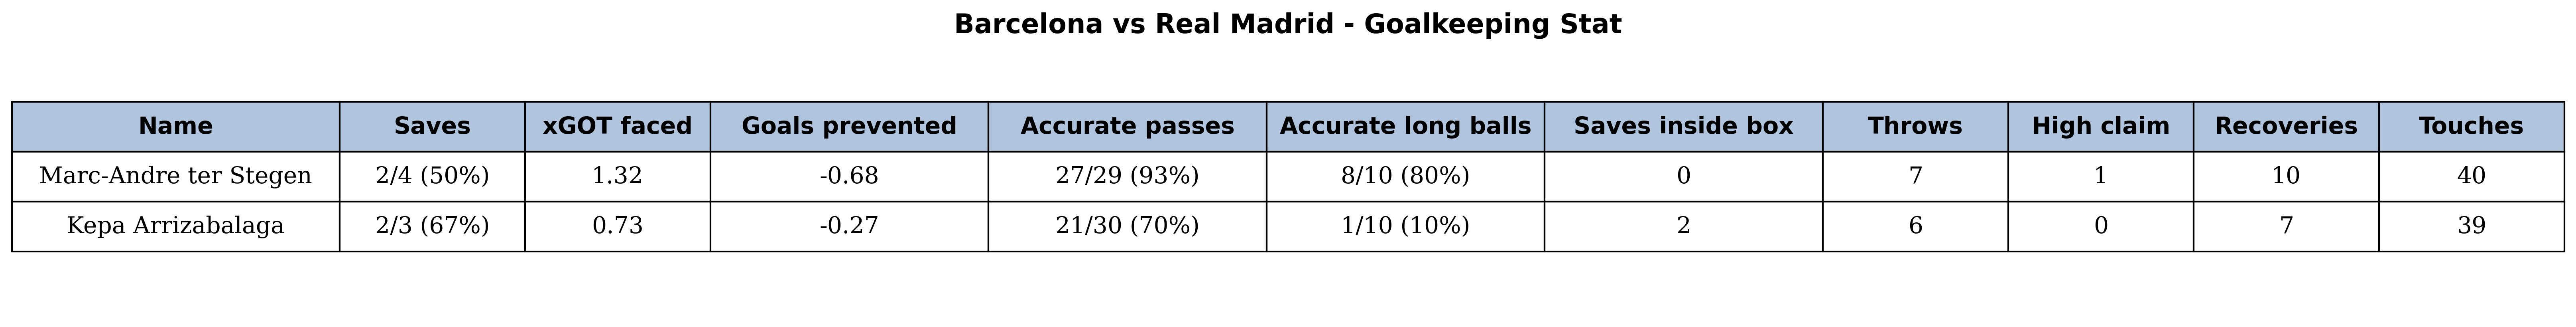

In [220]:
# Keeper Stats
first_team_players_data = main_content['lineup']['lineup'][0]['players']
second_team_players_data = main_content['lineup']['lineup'][1]['players']


keeper_columns = ['Name', 'Saves', 'xGOT faced', "Goals prevented",
                  'Accurate passes', 'Accurate long balls', 'Saves inside box',
                  'Throws', 'High claim', 'Recoveries', 'Touches']


keeper_table_data = []


def get_keeper_players_data(players: dict):
    for data in players:
        for player in data:
            if player["role"] == 'Keeper':
                item = player['stats'][0]['stats']
                player_stat = []
                for el in keeper_columns:
                    if el == 'Name':
                        player_stat.append(player['name']['fullName'])
                    else:
                        player_stat.append(item.get(el, {}).get('value', '-'),)

                keeper_table_data.append(player_stat)


get_keeper_players_data(first_team_players_data)
get_keeper_players_data(second_team_players_data)


show_table_data(columns=keeper_columns,
                table_data=keeper_table_data, scaleX=2.5, scaleY=2.5, fig_size=(8, 3), title='Goalkeeping Stat', pad=0)